In [1]:
from fastai.vision.all import *
path=untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()
dls=ImageDataLoaders.from_name_func(path,
                                    get_image_files(path),vaild_pct=0.2,seed=42,
                                    label_func=is_cat,
                                    item_tfms=Resize(224))
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.165343,0.025073,0.005413,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.058360,0.024813,0.006766,00:45


In [2]:
test_img='../temp/cat.jpg'
# test_img='../temp/dog.jpg'
img = PILImage.create(test_img)
is_cat,_,probs=learn.predict(img)
print(f'Is this a cat?: {is_cat}.')
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [3]:
from fastai.vision.all import * 
import numpy as np
path=untar_data(URLs.CAMVID_TINY)
dls=SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),
                                               label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                               codes=np.loadtxt(path/'codes.txt',dtype=str))
learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.657461,2.150669,00:01


epoch,train_loss,valid_loss,time
0,1.973040,1.569486,00:01
1,1.701679,1.641873,00:01
2,1.604230,1.236288,00:01
3,1.458826,0.989665,00:01
4,1.325400,0.865879,00:01
5,1.203408,0.823983,00:01
6,1.101711,0.742587,00:01
7,1.019025,0.731236,00:01


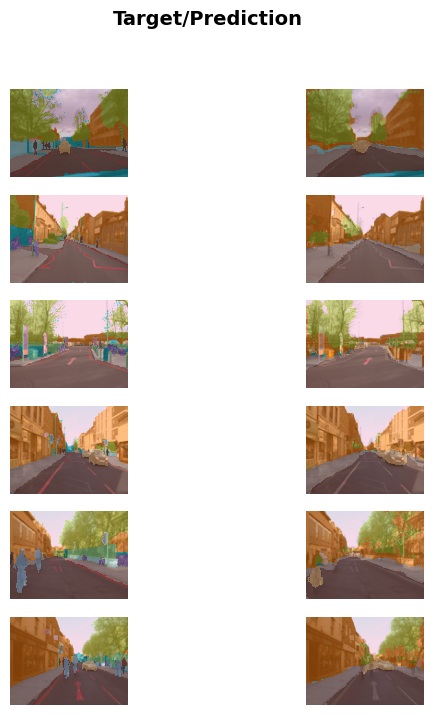

In [4]:
learn.show_results(max_n=6,figsize=(7,8))

In [3]:
from fastai.text.all import *
dls=TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5,metrics=accuracy)
learn.fine_tune(4,1e-2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


KeyboardInterrupt: 

In [ ]:
learn.predict("I really liked that movie!")

In [ ]:
doc(learn.predict)

In [ ]:
from fastai.tabular.all import * 
path=untar_data(URLs.ADULT_SAMPLE)
dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names='salary',
                                cat_names=['workclass','education','marital-status','occupation','relationship','race'],
                                cont_names=['age','fnlwgt','education_num'],
                                procs=[Categorify,FillMissing,Normalize])
learn=tabular_learner(dls,metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
dls=CollabDataLoaders.from_csv(path/'ratings.csv')
learn=collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.519196,1.400865,00:00


epoch,train_loss,valid_loss,time
0,1.378726,1.341647,00:00
1,1.266220,1.162852,00:00
2,1.022466,0.862622,00:00
3,0.792648,0.728742,00:00
4,0.690866,0.700267,00:00
5,0.642182,0.692967,00:00
6,0.629759,0.689137,00:00
7,0.616500,0.687372,00:00
8,0.614558,0.686939,00:00
9,0.608320,0.686829,00:00
